In [1]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# read alignment data

In [2]:
################
# THESE ARE THE ONLY PARAMETERS TO CHANGE



path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/"

path_to_folder_with_filenames = path+"08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/budding yeast abp1gfp/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"/08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/"
file = 'all tracks.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

excludeTheFirstNFrames = 5

# determine alignment method
#alignmentMethod = 'inflectionPoint'

alignmentMethod = 'intensity'
align_intensity_threshold = 0.5 # 50% intensity alignment

################


outputpath = path_to_all_tracks_data

In [11]:
filenamesData = pd.read_csv(outputpath+file+"_allProcessedFilePaths.csv")
filenamesData

,Unnamed: 0,filenames
0,0,/Users/johannesschoeneberg/Desktop/Schoeneberg...
1,1,/Users/johannesschoeneberg/Desktop/Schoeneberg...
2,2,/Users/johannesschoeneberg/Desktop/Schoeneberg...
3,3,/Users/johannesschoeneberg/Desktop/Schoeneberg...
4,4,/Users/johannesschoeneberg/Desktop/Schoeneberg...
5,5,/Users/johannesschoeneberg/Desktop/Schoeneberg...
6,6,/Users/johannesschoeneberg/Desktop/Schoeneberg...
7,7,/Users/johannesschoeneberg/Desktop/Schoeneberg...
8,8,/Users/johannesschoeneberg/Desktop/Schoeneberg...
9,9,/Users/johannesschoeneberg/Desktop/Schoeneberg...


In [13]:
# get all lifetimes

trackIds = []
lifetimes = []
maxIntensities = []

filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    trackId = data['Trajectory'][0]
    
    trackIds.append(max_intensity_AU)
    lifetimes.append(lifetime_frames)
    maxIntensities.append(trackId)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a13393e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a132d5860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a13393cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a132e0160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a132e05c0>],
 'means': []}

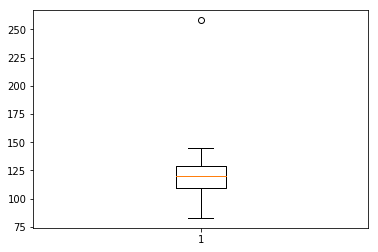

In [26]:
plt.boxplot(lifetimes)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a0ab0fba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0ab2e518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0ab0fa58>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0ab2edd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0ad6b278>],
 'means': []}

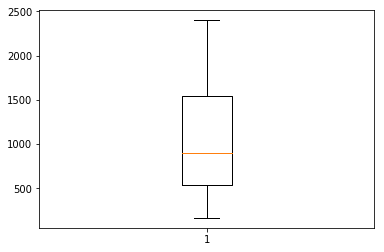

In [27]:
plt.boxplot(maxIntensities)

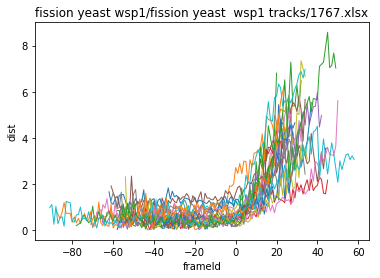

In [78]:
for filename in filenames:

    data = pd.read_csv(filename)
    
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    trackId = data['Trajectory'][0]
    
    trackIds.append(max_intensity_AU)
    lifetimes.append(lifetime_frames)
    maxIntensities.append(trackId)



for i in range(0,len(trackData)):
    trackId = fileIds[i]
    alignmentIdx = getAlignmentIdx(trackId)
    #simulate not having alignment
    #alignmentIdx = 0

    data = trackData[i]
    alignmentFrame = data['Frame'].astype(int)[alignmentIdx]

    t = (data['Frame'].astype(int))[0:-1]-alignmentFrame
    distancesFromStart = calcDistanceFromStart(data)
    
    plt.plot(t,distancesFromStart,lw=1)
    plt.title('distance from start')
    plt.xlabel('frameId')
    plt.ylabel('dist')
    plt.title(folder+file)
#plt.savefig(file+'_distToStart.png')

# intensity

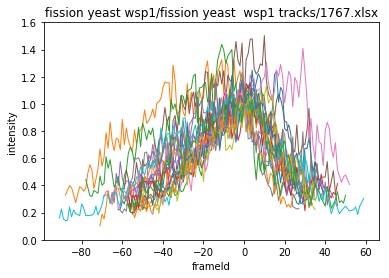

In [72]:
for i in range(0,len(trackData)):
    trackId = fileIds[i]
    alignmentIdx = getAlignmentIdx(trackId)

    data = trackData[i]
    alignmentFrame = data['Frame'].astype(int)[alignmentIdx]

    t = (data['Frame'].astype(int))-alignmentFrame
    a = data['m0'] / data['m0'].astype(float)[alignmentIdx]
    
    plt.plot(t,a,lw=1)
    plt.xlabel('frameId')
    plt.ylabel('intensity')
    plt.title(folder+file)
    plt.ylim(0,1.6)
#plt.savefig(file+'_intensity.png')


# speed

In [74]:
def calcSpeed(trackdata):
    x = trackdata['x']
    y = trackdata['y']
    frameByFrameDistances = []
    for i in range(1,len(data)):
        v0 = np.array([x[i-1],y[i-1]])
        v1 = np.array([x[i],y[i]])
        dist = np.linalg.norm(v0-v1)
        frameByFrameDistances.append(dist)
    frameByFrameDistances = np.array(frameByFrameDistances)
    return(frameByFrameDistances)






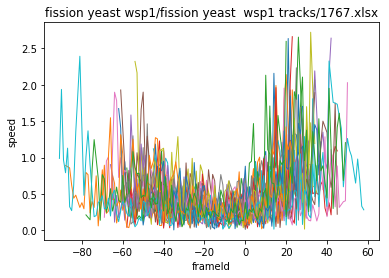

In [76]:
for i in range(0,len(trackData)):
    trackId = fileIds[i]
    alignmentIdx = getAlignmentIdx(trackId)

    data = trackData[i]
    alignmentFrame = data['Frame'].astype(int)[alignmentIdx]

    t = (data['Frame'].astype(int))[0:-1]-alignmentFrame
    frameByFrameDistances = calcSpeed(data)
    
    plt.plot(t,frameByFrameDistances,lw=1)
    plt.title('speed')
    plt.xlabel('frameId')
    plt.ylabel('speed')
    plt.title(folder+file)
#    plt.ylim(0,1.6)
#plt.savefig(file+'_speed.png')

